# Group 5: How equitable is the tree coverage in Austin?

## Part 2: Pipeline Testing, Model Selection, Results and Discussion

Irfana Mohamed Asif



### Import Necessary libraries 

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Load cleaned dataset as a geopandas dataframe

In [3]:
gdf = gpd.read_file('Canopy_EDA') #the condensed shape file from the Part 1 notebook

In [4]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOID20     403 non-null    int64   
 1   Tract_Area  403 non-null    float64 
 2   Canopy_Are  403 non-null    float64 
 3   Canopy%     403 non-null    float64 
 4   Total       403 non-null    int64   
 5   White       403 non-null    int64   
 6   Black       403 non-null    int64   
 7   American I  403 non-null    int64   
 8   Asian       403 non-null    int64   
 9   Native Haw  403 non-null    int64   
 10  Other       403 non-null    int64   
 11  Two or Mor  403 non-null    int64   
 12  Latino      403 non-null    int64   
 13  White%      403 non-null    float64 
 14  Black%      403 non-null    float64 
 15  American_1  403 non-null    float64 
 16  Asian%      403 non-null    float64 
 17  Native H_1  403 non-null    float64 
 18  Other%      403 non-null    float64 
 19  

In [5]:
gdf.head()

,GEOID20,Tract_Area,Canopy_Are,Canopy%,Total,White,Black,American I,Asian,Native Haw,...,American_1,Asian%,Native H_1,Other%,Two or M_1,Latino%,Median HHI,Imper.Area,Imperv%,geometry
0,48021950101,2.203567e+09,5.563207e+08,25.246376,6330,3373,166,0,36,0,...,0.0,0.005687,0.0,0.009163,0.117535545,0.308531,90498,4.514139e+07,0.020486,"POLYGON ((3194259.201 10052446.255, 3194298.28..."
1,48021950102,2.043855e+09,1.035976e+06,0.050687,4221,2779,21,0,5,0,...,0.0,0.001185,0.0,0.000000,0.020374319,0.315091,92207,2.582453e+06,0.001264,"POLYGON ((3226561.026 10120397.363, 3226837.99..."
2,48021950201,1.610528e+08,6.316777e+05,0.392218,2818,699,1081,0,6,0,...,0.0,0.002129,0.0,0.000000,0.004613201,0.361604,60602,3.895667e+06,0.024189,"POLYGON ((3229627.412 10107750.717, 3229655.33..."
3,48021950202,2.382433e+08,2.062106e+07,8.655465,5862,2321,1069,0,19,0,...,0.0,0.003241,0.0,0.000000,0.00017059,0.418287,95333,2.321229e+07,0.097431,"POLYGON ((3217373.514 10101088.130, 3217585.24..."
4,48021950301,9.299677e+08,2.413357e+08,25.950978,5548,3053,464,0,223,0,...,0.0,0.040195,0.0,0.000000,0.036409517,0.289474,112775,2.828050e+07,0.030410,"POLYGON ((3182589.056 10039151.474, 3182599.48..."


## Set-up Features and Target Variables 

From the feedback of the final presentation, we were asked to reduce the race/ethnicity variables. Our model already reduced it to four varaibles based on the top % of the population as well as the correlation of coefficients in the heat map. The race/ethinicity factors are White%, Black%, Asian%, Latino%. We removed the race/ethnicity variables that contributed less % to the population as well as had low correlations in the heat map. 

The population density was not considered as a feature because the census tract encompasses the population density of a region. 

We included impervious% as the tree canopy would be related to the impervious land in Austin. Median househould income is included as a feature because we wanted to see whether race/ethnicity mattered more or income.

In [6]:
X = gdf.loc[:,['White%','Black%','Asian%','Latino%','Median HHI','Imperv%']] #features
y = gdf['Canopy%'] #target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 4)

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Creating Pipeline for Regression 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error


In [8]:
#Define pipelines

pipeline_lr =Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LinearRegression())])

pipeline_dt = Pipeline([('scalar1',StandardScaler()),
                     ('classifier',DecisionTreeRegressor())])
                
pipeline_rt = Pipeline([('scalar1',StandardScaler()),
                     ('classifier',RandomForestRegressor())])

pipeline_svr = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', SVR())])

pipeline_gb = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', GradientBoostingRegressor())])

pipeline_lasso = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', LassoCV())])

pipeline_ridge = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', RidgeCV())])


In [9]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rt, pipeline_svr, pipeline_gb, pipeline_lasso, pipeline_ridge]

In [10]:
# Dictionary of pipelines 
pipe_dict = {0: 'Linear Regression', 1: 'Decision Tree Regressor', 2: 'Random Forest Regressor', 3: 'SVR', 4: 'Gradient Boost Regressor', 5: 'Lasso', 6: 'Ridge'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [11]:
for i,model in enumerate(pipelines):
    print("\nModel: ", pipe_dict[i])
    print ('Test Accuracy:', model.score(X_test, y_test))
    print("Train Accuracy: ", model.score(X_train, y_train))
    print('\n -------------------------------------------------------------------------')




Model:  Linear Regression
Test Accuracy: 0.15550063848160633
Train Accuracy:  0.17603414140099083

 -------------------------------------------------------------------------

Model:  Decision Tree Regressor
Test Accuracy: -0.18136697321714168
Train Accuracy:  1.0

 -------------------------------------------------------------------------

Model:  Random Forest Regressor
Test Accuracy: 0.1434318944690811
Train Accuracy:  0.8759470338737994

 -------------------------------------------------------------------------

Model:  SVR
Test Accuracy: 0.03880103409576652
Train Accuracy:  0.12677512801901913

 -------------------------------------------------------------------------

Model:  Gradient Boost Regressor
Test Accuracy: 0.034498792338781836
Train Accuracy:  0.7832811715440154

 -------------------------------------------------------------------------

Model:  Lasso
Test Accuracy: 0.14778213722561384
Train Accuracy:  0.17379145803426488

 ------------------------------------------------

The test accuracy was very low for all these models. We are focussing on the test scores as it gives us as an initial evaualtion metric as it tells us the number of correct predictions made in relation to the total predictions made. All of these are below 20% so we cannot use these models for predictions. 

We will look at hyperparameters and optimize them to see if we get a better result. We selected the top 4 models that performed well to optimize for the hyperparameters. 

## Choosing Hyperparameters to optimize 

In [12]:
pipeline_lr =Pipeline([('scalar1',StandardScaler()),
                     ('classifier',LinearRegression())])

grid_param_lr = {
                'classifier__fit_intercept': [True, False],
                
}

pipeline_rt = Pipeline([('scalar1',StandardScaler()),
                     ('classifier',RandomForestRegressor(random_state =42))])
grid_param_rt = {
            
                'classifier__max_depth': [None, 5, 10],
                'classifier__n_estimators': [5, 50, 100, 200], 
                'classifier__min_samples_split': [2, 5, 10],
}

pipeline_lasso = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', LassoCV(random_state =42))])
grid_param_lasso = {
               
        'classifier__n_alphas': [1, 5, 10], 
      
                
}

pipeline_ridge = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', RidgeCV())])
grid_param_ridge = {
                
                'classifier__alphas': [1, 5, 10], 
                'classifier__fit_intercept': [True, False],
                  
}

In [13]:
pipelines = [pipeline_lr, pipeline_rt, pipeline_lasso, pipeline_ridge]
grid_params = [grid_param_lr,grid_param_rt, grid_param_lasso, grid_param_ridge]

In [14]:
# Dictionary of pipelines
pipe_dict = {0: 'Linear Regression', 1: 'Random Forest Regressor', 2: 'Lasso', 3: 'Ridge'}

for i,model in enumerate(pipelines):
    print("\nPerforming grid search for", pipe_dict[i])
    grid_search = GridSearchCV(estimator=pipelines[i], param_grid=grid_params[i], scoring='neg_mean_squared_error', error_score='raise', cv=5)
    best_model = grid_search.fit(X_train, y_train)
    
    # Best parameters
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    predictions = best_model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    
    
    print ('Test Accuracy:', best_model.score(X_test, y_test))
    print("Train Accuracy: ", best_model.score(X_train, y_train))
    print("r2: ", r2)
    print('\n -------------------------------------------------------------------------')



Performing grid search for Linear Regression
Best Parameters: {'classifier__fit_intercept': True}
Test Accuracy: 0.15550063848160633
Train Accuracy:  0.17603414140099083
r2:  0.15550063848160633

 -------------------------------------------------------------------------

Performing grid search for Random Forest Regressor
Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Test Accuracy: 0.19870982531199377
Train Accuracy:  0.5493260128035236
r2:  0.19870982531199377

 -------------------------------------------------------------------------

Performing grid search for Lasso
Best Parameters: {'classifier__n_alphas': 10}
Test Accuracy: 0.14779202830086802
Train Accuracy:  0.17376480634528446
r2:  0.14779202830086802

 -------------------------------------------------------------------------

Performing grid search for Ridge
Best Parameters: {'classifier__alphas': 10, 'classifier__fit_intercept': True}
Test Accuracy: 0.14698

The test accuracy was very low even after optimizing for hyperparameters. Therefore, we cannot use these models to make any predictions.

## Converting to a Classification Problem 

We decided to convert this problem into a classification problem to see whether we can see any predictors of equitable tree canopy distribution in Austin based off a binary target variable.

We chose the cut-off as 30%, where less than 30% will be 0 and greater than 30% will be 1. We chose this value from the reference below which says that 30% is the minimum recommended tree canopy cover in a neighborhood to lead a healthy life. This converted our regression problem into a classification one. 

Konijnendijk, C.C. Evidence-based guidelines for greener, healthier, more resilient neighbourhoods: Introducing the 3–30–300 rule. J. For. Res. 34, 821–830 (2023).

In [15]:
X = gdf.loc[:,['White%','Black%','Asian%','Latino%','Median HHI','Imperv%']]#features

#Converting the target variable to a binary value based on the cut-off as mentioned above 
y = (gdf['Canopy%'] >= 30).astype(int) #target variable

y_notconverted = gdf['Canopy%']

print('The Canopy % before conversion:\n', y_notconverted.head(10))
print('\nThe Canopy % after conversion: \n',y.head(10))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle = True, random_state = 4)

#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The Canopy % before conversion:
 0    25.246376
1     0.050687
2     0.392218
3     8.655465
4    25.950978
5    12.017177
6    40.109515
7    20.695224
8    37.364830
9     9.507874
Name: Canopy%, dtype: float64

The Canopy % after conversion: 
 0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: Canopy%, dtype: int64


## Creating Pipeline for Classification 

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix


In [17]:
#Define the pipelines

pipeline_lr =Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression())])

pipeline_dt = Pipeline([('scalar1',StandardScaler()),
                     ('classifier',DecisionTreeClassifier())])
                
pipeline_rt = Pipeline([('scalar1',StandardScaler()),
                     ('classifier',RandomForestClassifier())])

pipeline_svr = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', SVC())])

pipeline_gb = Pipeline([('scalar1',StandardScaler()),
                     ('classifier', GradientBoostingClassifier())])


In [18]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rt, pipeline_svr, pipeline_gb]

In [19]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree Classifier', 2: 'Random Forest Classifier', 3: 'SVC', 4: 'Gradient Boost Classifier'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [20]:
for i,model in enumerate(pipelines):
    predictions = model.predict(X_test)
    print("\nModel: ", pipe_dict[i])
    print ('Test Accuracy:', model.score(X_test, y_test))
    print("Train Accuracy: ", model.score(X_train, y_train))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print('\n -------------------------------------------------------------------------')



Model:  Logistic Regression
Test Accuracy: 0.6049382716049383
Train Accuracy:  0.6708074534161491

Confusion Matrix:
[[13 21]
 [11 36]]
              precision    recall  f1-score   support

           0       0.54      0.38      0.45        34
           1       0.63      0.77      0.69        47

    accuracy                           0.60        81
   macro avg       0.59      0.57      0.57        81
weighted avg       0.59      0.60      0.59        81


 -------------------------------------------------------------------------

Model:  Decision Tree Classifier
Test Accuracy: 0.5432098765432098
Train Accuracy:  1.0

Confusion Matrix:
[[19 15]
 [22 25]]
              precision    recall  f1-score   support

           0       0.46      0.56      0.51        34
           1       0.62      0.53      0.57        47

    accuracy                           0.54        81
   macro avg       0.54      0.55      0.54        81
weighted avg       0.56      0.54      0.55        81


 ----

These models performed much better than the regression models in terms of both test and train accuracy. 

## Choosing the Best Model 

We chose the best models to look at feature importance to see whether we could predict tree canopy cover in Austin in an equitable way. 

The Gradient Boost had best test/train accuracy. We also evaluated the confusion matrix and got the F1 score and the gradient boost performed the better for this metric as well in comparison to SVC which performed well too. 

We plotted the feature importance and the confusion matrix of the following:

1. Gradient Boost: It is the model that performed the best with the metrics described above. 
2. Logistic Regression: To better understand the coefficients that matter to this problem
3. Random Forest Classification: This metric had the best train score so we wanted to see if this model gave any different insights. There is a possibility this model overfit the data as well.


In [31]:
#Running the model for the gradient boost algorithm

model = GradientBoostingClassifier()


#fitting the model
model.fit(X_train, y_train)

predictions = (model.predict(X_test))

cm = confusion_matrix(y_test, predictions)

print ('Test Accuracy:', model.score(X_test, y_test))
print("Train Accuracy:", model.score(X_train, y_train))
print("\n Classification Report:")
print(classification_report(y_test, predictions))


Test Accuracy: 0.6419753086419753
Train Accuracy: 0.9596273291925466

 Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        34
           1       0.70      0.66      0.68        47

    accuracy                           0.64        81
   macro avg       0.64      0.64      0.64        81
weighted avg       0.65      0.64      0.64        81



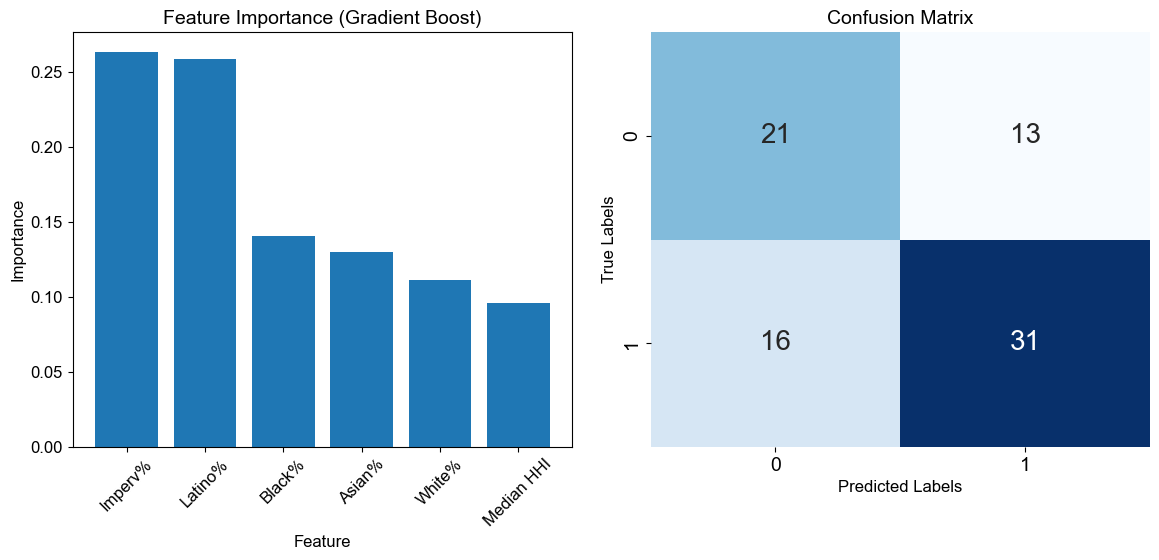

In [32]:
#Plots for Graident Boost

feature_importances = model.feature_importances_

feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.title("Feature Importance (Gradient Boost)", fontsize=14)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

plt.tight_layout()

plt.show()

In [33]:
#Running the model for a logistic regression

model = LogisticRegression()


#fitting the model
model.fit(X_train, y_train)

predictions = (model.predict(X_test))

cm = confusion_matrix(y_test, predictions)

print ('Test Accuracy:', model.score(X_test, y_test))
print("Train Accuracy:", model.score(X_train, y_train))
print("\n Classification Report:")
print(classification_report(y_test, predictions))

Test Accuracy: 0.6049382716049383
Train Accuracy: 0.6708074534161491

 Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.38      0.45        34
           1       0.63      0.77      0.69        47

    accuracy                           0.60        81
   macro avg       0.59      0.57      0.57        81
weighted avg       0.59      0.60      0.59        81



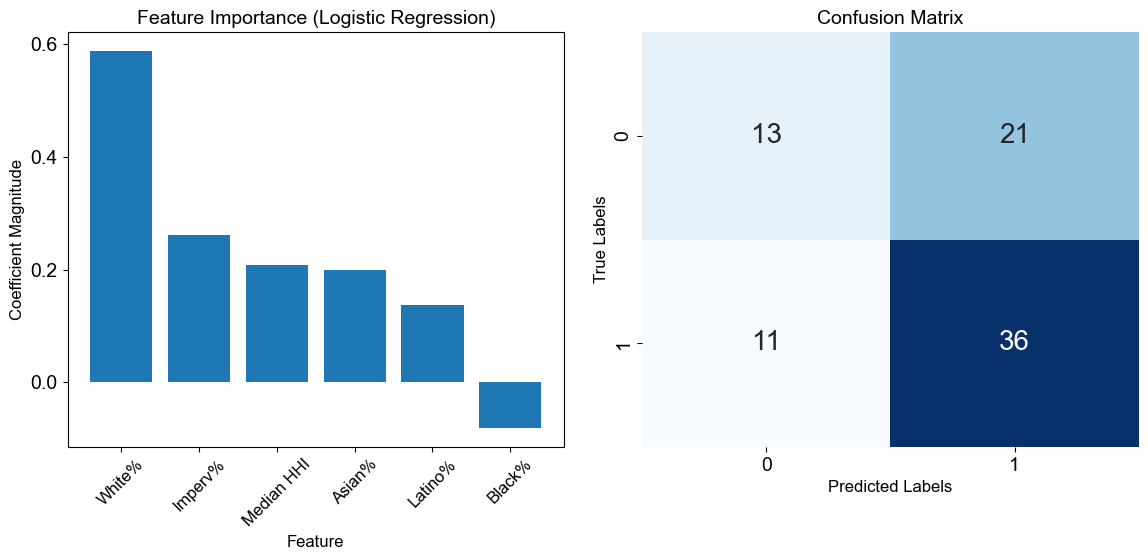

In [34]:
#Plots for Logistic Regression 

# Get feature coefficients
coefficients = model.coef_[0]

# Get feature names
feature_names = X.columns

# Sort feature coefficients in descending order of magnitude
indices = np.argsort(np.abs(coefficients))[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Coefficient Magnitude",fontsize=12)
plt.title("Feature Importance (Logistic Regression)",fontsize=14)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

plt.tight_layout()

plt.show()

In [35]:
#Running the model for Random Forest

model = RandomForestClassifier()

model.fit(X_train, y_train)

predictions = (model.predict(X_test))

cm = confusion_matrix(y_test, predictions)

print ('Test Accuracy:', model.score(X_test, y_test))
print("Train Accuracy:", model.score(X_train, y_train))
print("\n Classification Report:")
print(classification_report(y_test, predictions))

Test Accuracy: 0.6172839506172839
Train Accuracy: 1.0

 Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        34
           1       0.67      0.66      0.67        47

    accuracy                           0.62        81
   macro avg       0.61      0.61      0.61        81
weighted avg       0.62      0.62      0.62        81



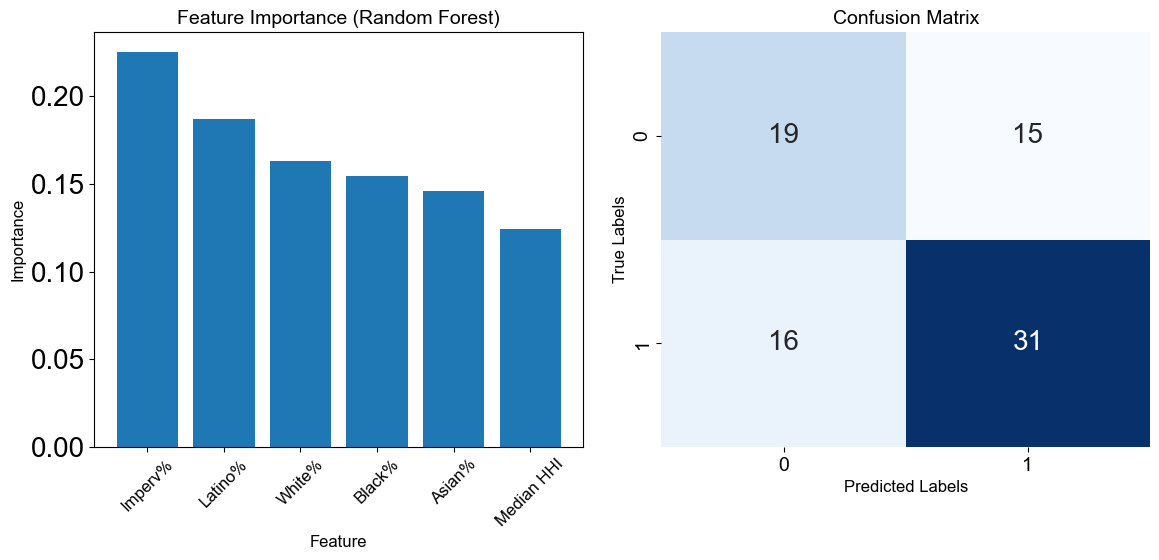

In [36]:
#Plots for Random Forests 

feature_importances = model.feature_importances_
rmse = mean_squared_error(y_test, predictions, squared=False)


# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.title("Feature Importance (Random Forest)", fontsize=14)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)


plt.tight_layout()

plt.show()

## Results and Discussion

From all the features above, the largest take-away is that race/ethnicity is a larger predictor of tree canopy coverage than median income is. This means that when the city is looking at where they would want to plant the trees, focusing efforts on minority neighborhoods should be a priority. In all models, a tract with majority white population is a strong predictor of tree canopy.

We can see that for both Gradient Boost and Random Forest, the features importance are similar. After the impervious (%) cover, being Hispanic/Latino is the greatest predictor of tree canopy%. 

For the logistic regression, it shows that being Black/African American is negatively correlated to tree canopy %. This means that efforts related to increase tree canopy should be directed to tracts that have a high Black/African American population

We have plotted tree canopy coverage (>30%) beside the tracts of majority Hispanic/Latino population and another plot beside the majority black or African American population to drive home this discussion. 

In [27]:
gdf['Canopy30'] = np.where(gdf['Canopy%'] < 30, 0, 1)

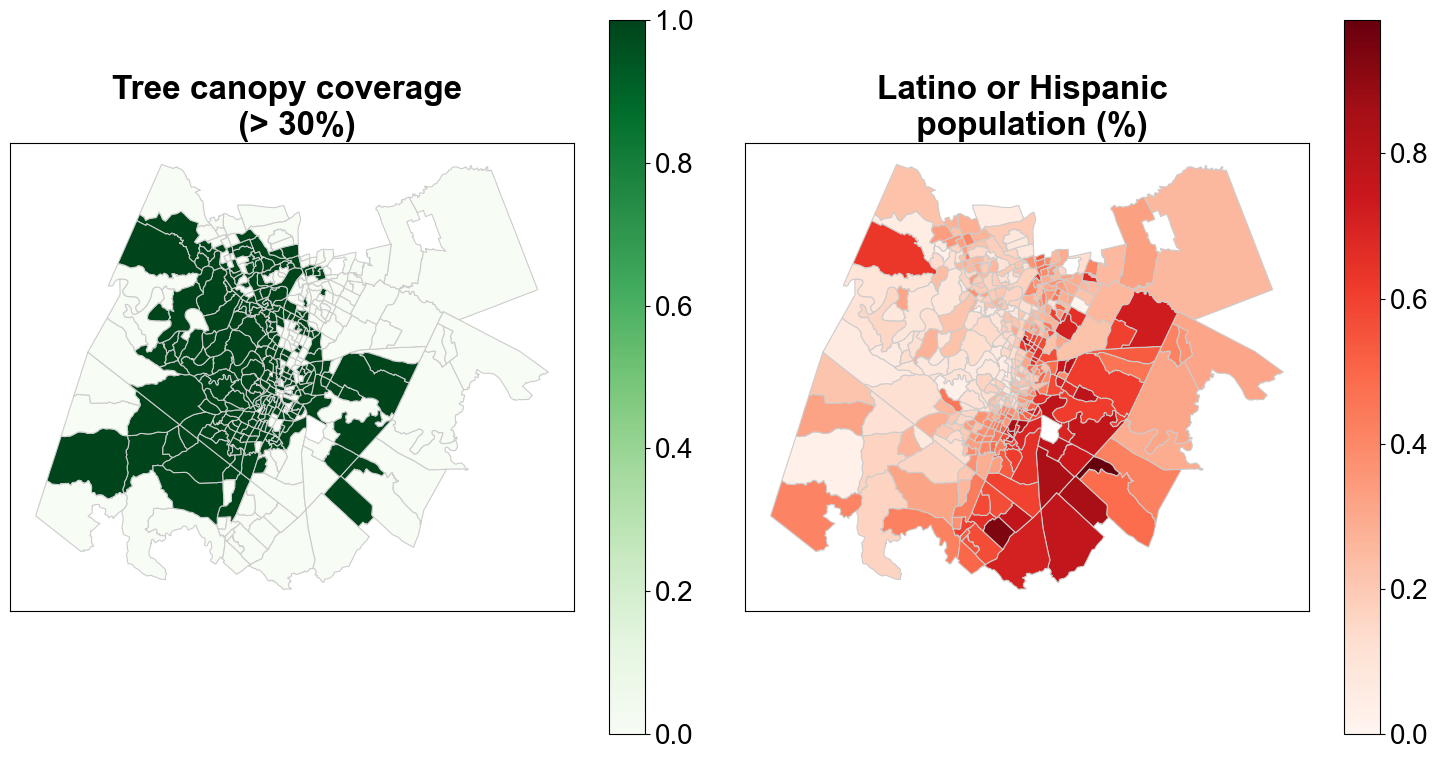

In [28]:
from matplotlib import rcParams

# Set font family and size
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 20


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharex=True, subplot_kw={'aspect': 'equal'})

# Plot the first variable
gdf.plot(column='Canopy30', ax=axs[0], legend=True, cmap='Greens',linewidth=0.8, edgecolor='0.8')

# Plot the fifth variable
gdf.plot(column='Latino%', ax=axs[1], legend=True, cmap='Reds',linewidth=0.8, edgecolor='0.8')

# Add titles to subplots
axs[0].set_title('Tree canopy coverage \n (> 30%)')
axs[1].set_title('Latino or Hispanic \n population (%)')


for ax in axs.flat:
    ax.set_title(ax.get_title(), fontdict={'family': 'Arial', 'weight': 'bold'})
        # Hide x and y ticks
    ax.set_xticks([])
    ax.set_yticks([]) 

    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

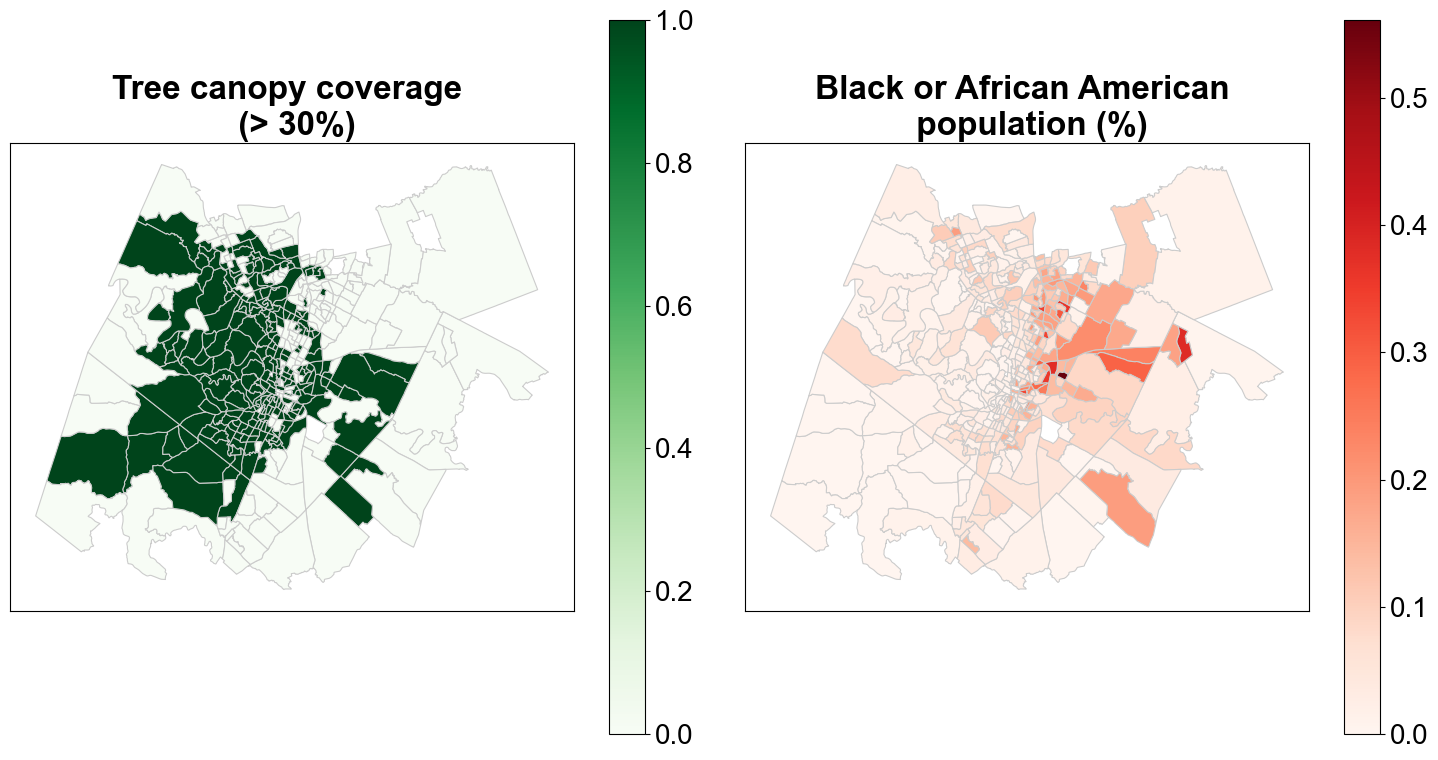

In [29]:
from matplotlib import rcParams

# Set font family and size
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 20


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharex=True, subplot_kw={'aspect': 'equal'})

# Plot the first variable
gdf.plot(column='Canopy30', ax=axs[0], legend=True, cmap='Greens',linewidth=0.8, edgecolor='0.8')

# Plot the fifth variable
gdf.plot(column='Black%', ax=axs[1], legend=True, cmap='Reds',linewidth=0.8, edgecolor='0.8')

# Add titles to subplots
axs[0].set_title('Tree canopy coverage \n (> 30%)')
axs[1].set_title('Black or African American \n population (%)')


for ax in axs.flat:
    ax.set_title(ax.get_title(), fontdict={'family': 'Arial', 'weight': 'bold'})
        # Hide x and y ticks
    ax.set_xticks([])
    ax.set_yticks([]) 

    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Final Take-aways: 

1. The average  tree canopy cover of the city of Austin is 42%, however,  only 243 of 403 census tracts have a canopy cover higher than 30%. Therefore, a smaller concentration of tracts have a high tree canopy %. This indicated a need for more equitable planting of trees. 

2. Classification models performed better than regression models for this problem.

3. Race/ethnicity parameters were stronger indicators than income to predict canopy cover.

4. Tracts with Black/African American populations should be prioritized for planting trees in Austin to ensure equitable tree cover canopy. 
